In [20]:
import pandas as pd
import matplotlib.pyplot as plt 
import pyvis
import networkx as nx


In [22]:
import pandas as pd

df_comp = (pd.read_csv("Connections.csv", skiprows=2)
               .rename(columns=lambda x: x.lower().replace(' ', '_'))
               .drop(['first_name', 'last_name', 'email_address', 'url'], axis=1)
               .dropna(subset=['company', 'position']))

df_comp['connected_on'] = pd.to_datetime(df_comp['connected_on'], format='%d %b %Y')

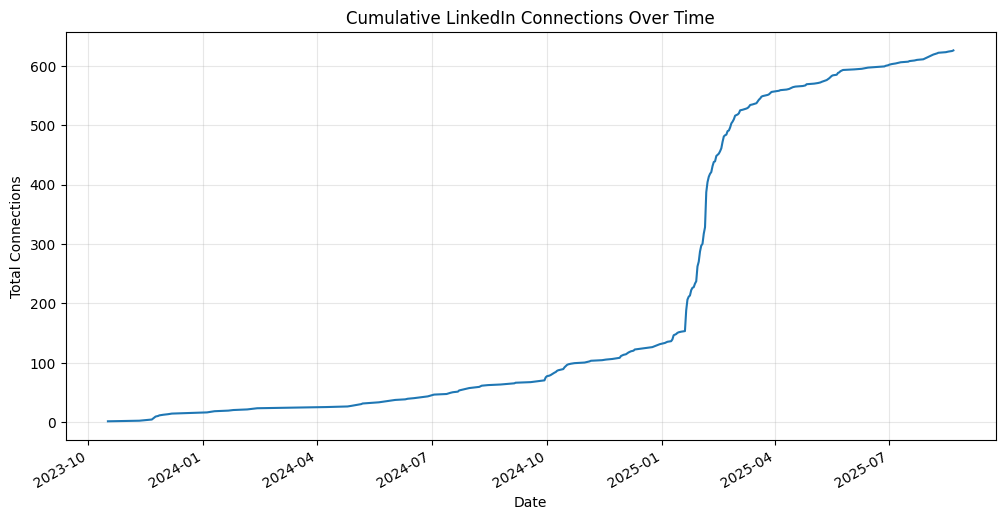

In [23]:
# Plot connections growth over time
df_comp['connected_on'].value_counts().sort_index().cumsum().plot(
    figsize=(12, 6), 
    title='Cumulative LinkedIn Connections Over Time'
)
plt.xlabel('Date')
plt.ylabel('Total Connections')
plt.grid(alpha=0.3)

Text(0.5, 1.0, 'Top 10 Companies in Network')

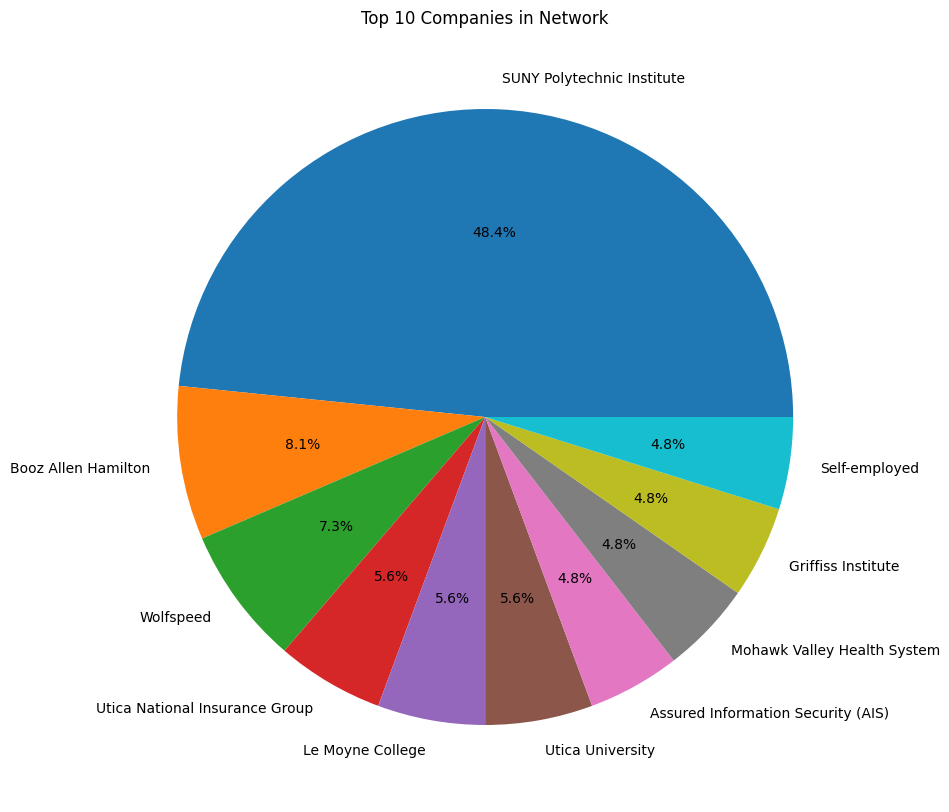

In [24]:
industry_counts = df_comp['company'].value_counts().head(10)
plt.figure(figsize=(10, 10))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%')
plt.title('Top 10 Companies in Network')

Text(0.5, 1.0, 'Connection Activity Heatmap')

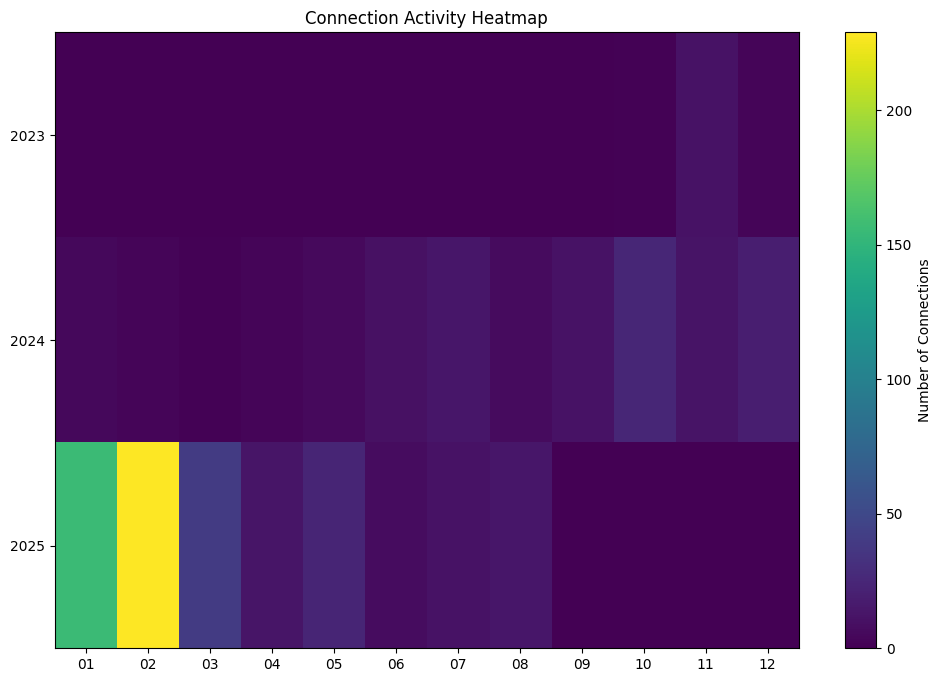

In [25]:
df_comp['month_year'] = df_comp['connected_on'].dt.to_period('M')
connections_by_month = df_comp['month_year'].value_counts().sort_index()

month_year_df = connections_by_month.copy()
month_year_df.index = month_year_df.index.astype(str)
month_year_df = month_year_df.reset_index()
month_year_df['year'] = month_year_df['month_year'].str[:4]
month_year_df['month'] = month_year_df['month_year'].str[5:7]
pivot = month_year_df.pivot(index='year', columns='month', values='count').fillna(0)

plt.figure(figsize=(12, 8))
plt.imshow(pivot, cmap='viridis', aspect='auto')
plt.xticks(ticks=range(len(pivot.columns)), labels=pivot.columns)
plt.yticks(ticks=range(len(pivot.index)), labels=pivot.index)
plt.colorbar(label='Number of Connections')
plt.title('Connection Activity Heatmap')

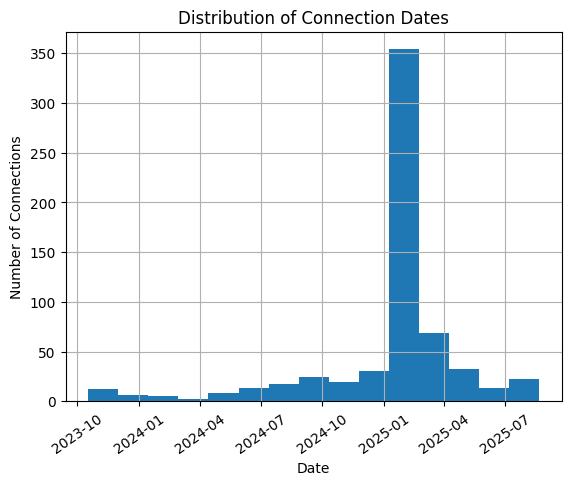

In [26]:
df_comp['connected_on'].hist(xrot=35, bins=15)
plt.title('Distribution of Connection Dates')
plt.xlabel('Date')
plt.ylabel('Number of Connections')
plt.show()

In [28]:
from pyvis.network import Network

# Create interactive network
net = Network(notebook=True, height='800px', width='100%', bgcolor="#222222", font_color='white')

# Add yourself as central node
net.add_node(0, label="You", color="#FF5733", size=25)

# Add company nodes (limit to top N for clarity)
for i, (company, count) in enumerate(industry_counts.items()):
    net.add_node(i+1, label=company, title=f"{company}: {count} connections", 
                size=count*3, color="#3449eb")
    net.add_edge(0, i+1, width=count/2)
    
# Add physics options for better visualization
net.set_options('''
{
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -50,
      "centralGravity": 0.01,
      "springLength": 100,
      "springConstant": 0.08
    },
    "maxVelocity": 50,
    "solver": "forceAtlas2Based",
    "timestep": 0.35,
    "stabilization": {
      "enabled": true,
      "iterations": 1000,
      "updateInterval": 25
    }
  }
}
''')

# Save and display the network
net.show("linkedin_network.html")

linkedin_network.html


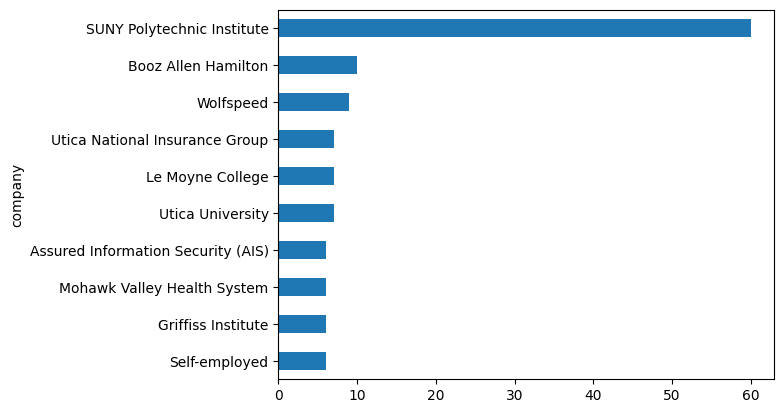

In [29]:
df_comp['company'].value_counts().head(10).plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

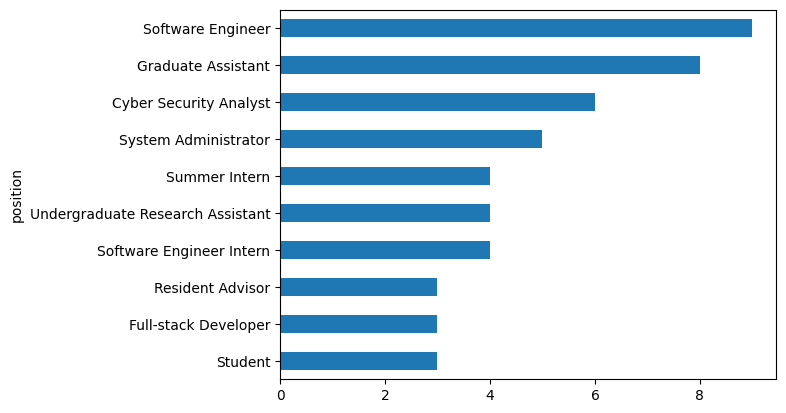

In [30]:
ax = df_comp['position'].value_counts().head(10).plot(kind="barh")
ax.invert_yaxis()
plt.show()

In [31]:
df_position = df_comp['position'].value_counts().reset_index()
df_position.columns = ['position', 'count']
df_position = df_position.sort_values(by="count", ascending=False)
df_position.head(20)

,position,count
0,Software Engineer,9
1,Graduate Assistant,8
2,Cyber Security Analyst,6
3,System Administrator,5
4,Summer Intern,4
5,Undergraduate Research Assistant,4
6,Software Engineer Intern,4
7,Resident Advisor,3
8,Full-stack Developer,3
9,Student,3


Text(0.5, 1.0, 'Position-Company Network')

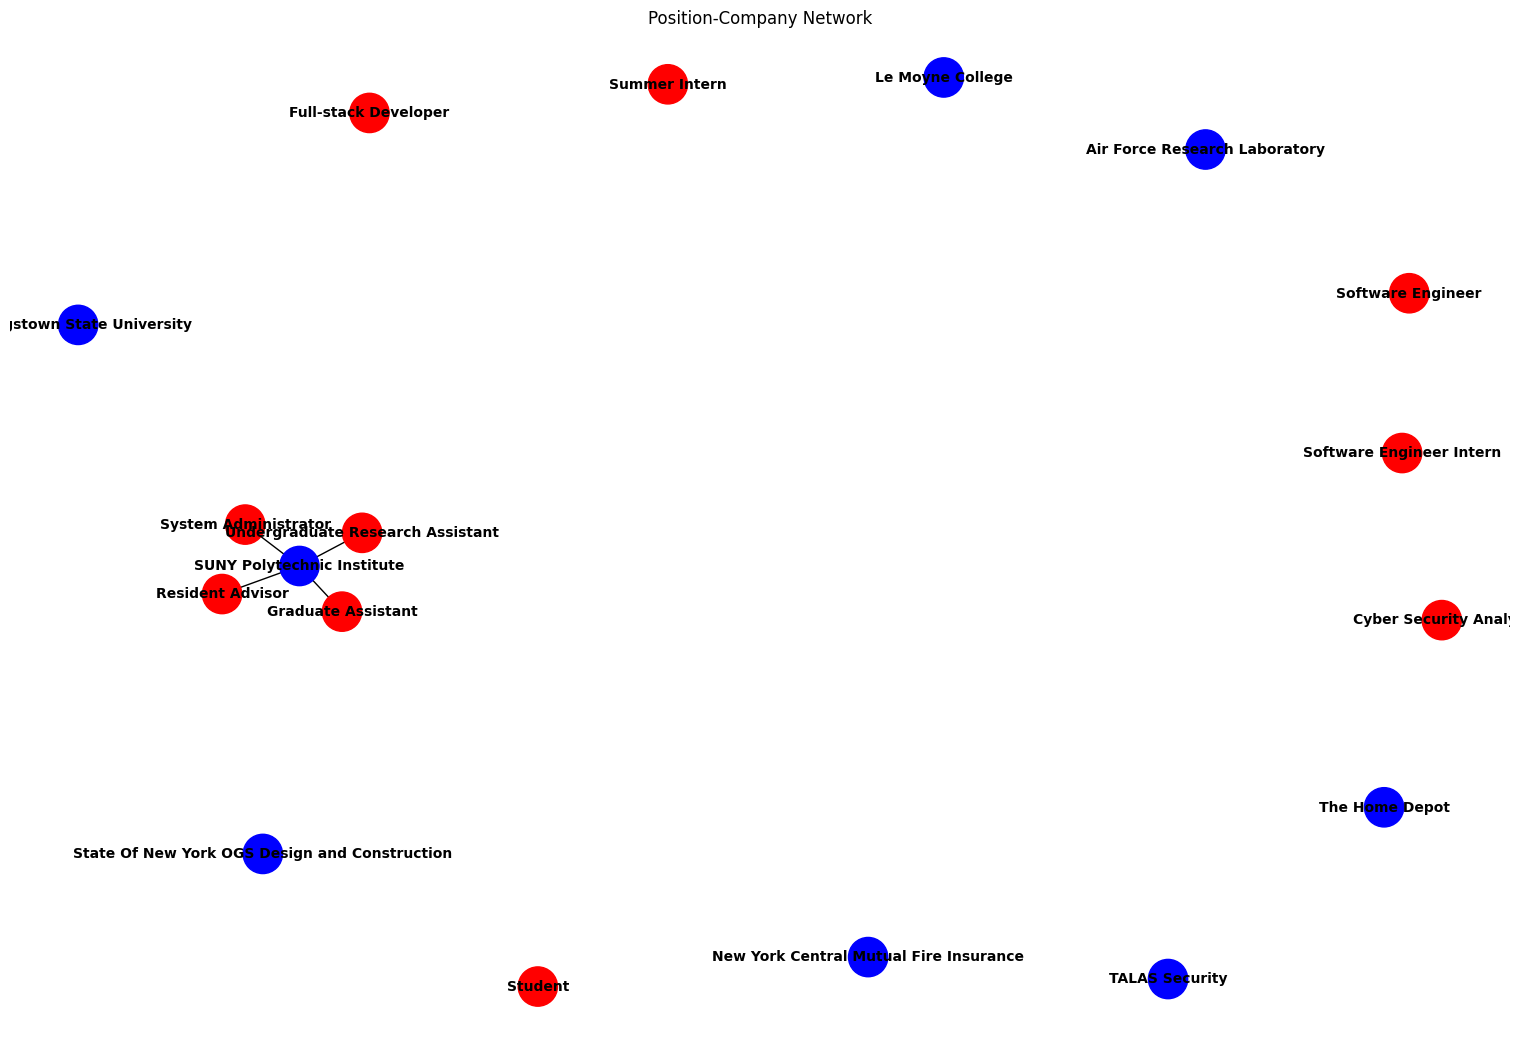

In [32]:
b_graph = nx.Graph()

# Add position and company nodes
positions = df_position['position'].head(10).tolist()
companies = df_comp['company'].head(10).tolist()

# Add nodes with different colors for positions vs companies
for p in positions:
    b_graph.add_node(p, bipartite=0, color='red')
for c in companies:
    b_graph.add_node(c, bipartite=1, color='blue')

# Add edges between positions and companies
for _, row in df_comp.iterrows():
    if row['position'] in positions and row['company'] in companies:
        b_graph.add_edge(row['position'], row['company'])

# Plot
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(b_graph)
nx.draw(b_graph, pos, with_labels=True, node_color=[b_graph.nodes[n]['color'] for n in b_graph.nodes],
        node_size=800, font_size=10, font_weight='bold')
plt.title('Position-Company Network')

/tmp/ipykernel_18351/3609731733.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


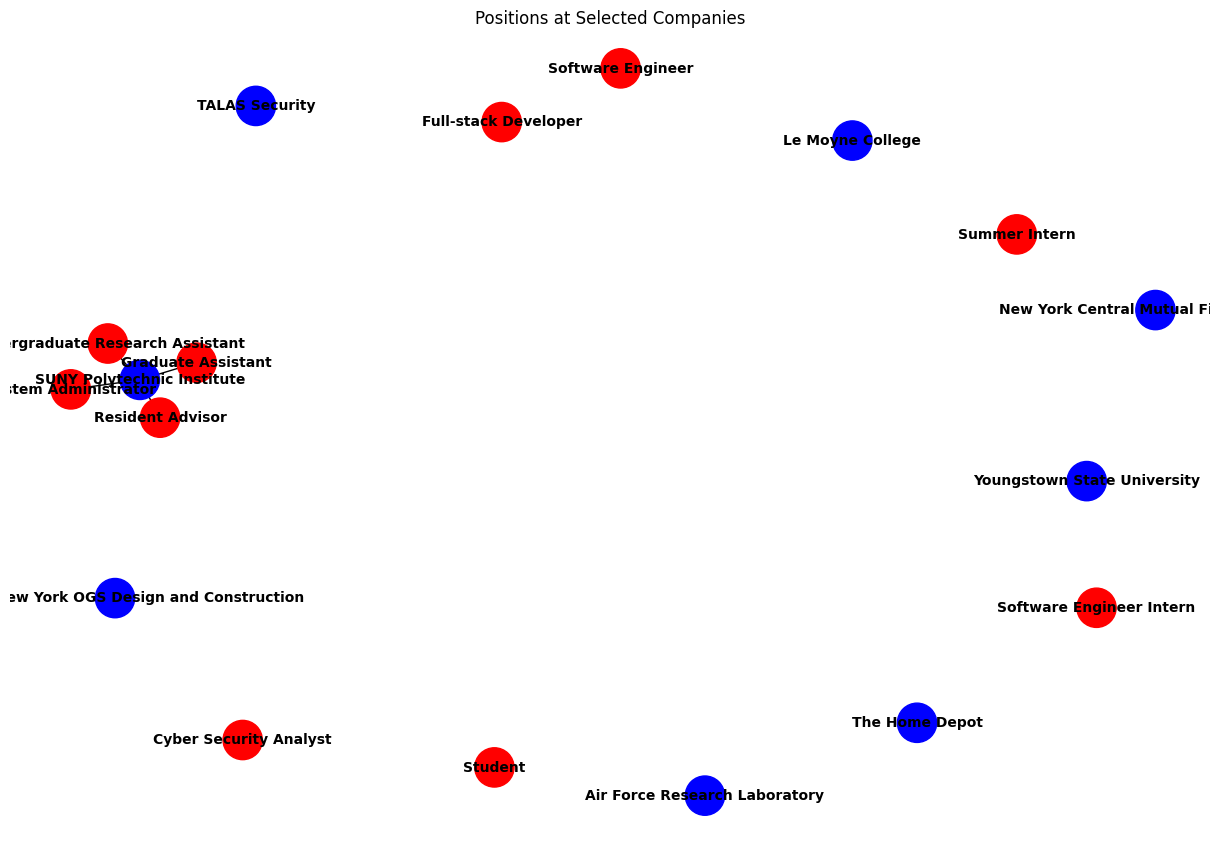

In [ ]:
b_graph = nx.Graph()

# Add nodes with different colors for positions vs companies
for p in positions:
    b_graph.add_node(p, bipartite=0, color='red')
for c in companies:
    b_graph.add_node(c, bipartite=1, color='blue')

# Add edges between positions and companies
for _, row in df_comp.iterrows():
    if row['position'] in positions and row['company'] in companies:
        b_graph.add_edge(row['position'], row['company'])

target_companies = companies[:15]  # Take the first ten companies from the list
# Extract all positions associated with these companies
positions_in_target_companies = {}

for company in target_companies:
    if company in b_graph.nodes:
        # Get all neighbors of this company node (which will be positions)
        connected_positions = list(b_graph.neighbors(company))
        positions_in_target_companies[company] = connected_positions
        
        print(f"Positions at {company}:")
        for position in connected_positions:
            print(f"  - {position}")
# Add nodes with different colors for positions vs companies
for p in positions:
    b_graph.add_node(p, bipartite=0, color='red')
for c in companies:
    b_graph.add_node(c, bipartite=1, color='blue')

# Add edges between positions and companies
for _, row in df_comp.iterrows():
    if row['position'] in positions and row['company'] in companies:
        b_graph.add_edge(row['position'], row['company'])


def create_company_position(companies_list):

    
    # Add company nodes
    for company in companies_list:
        if company in b_graph:
            b_graph.add_node(company, bipartite=1, color='blue')
            
            # Get positions connected to this company
            for position in b_graph.neighbors(company):
                b_graph.add_node(position, bipartite=0, color='red')
                b_graph.add_edge(company, position)
    
    return b_graph

# Select specific companies to analyze
companies_of_interest = ["Company A", "Company B", "Company C"]  # Replace with actual companies
company_subgraph = create_company_position(companies_of_interest)

# Visualize the subgraph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(company_subgraph, seed=42)  # Fixed seed for reproducibility
nx.draw(company_subgraph, pos, 
        with_labels=True,
        node_color=[company_subgraph.nodes[n]['color'] for n in company_subgraph.nodes],
        node_size=800, 
        font_size=10,
        font_weight='bold')
plt.title('Positions at Selected Companies')
plt.tight_layout()
plt.show()

